In [734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [735]:
df = pd.read_csv("Customer_Segmentation_Dataset - customer_segmentation.csv")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **DATA CLEANING**

In [737]:
df1 = df.rename(columns= lambda x: x.lower())

In [738]:
df1.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [739]:
df1["income"] = pd.to_numeric(df1["income"], errors='coerce')

df1["income"] = df1["income"].fillna(df1.income.mean())

In [740]:
df1["dt_customer"] = pd.to_datetime(df1["dt_customer"], format='%d-%m-%Y')

# **Feature Engineering**

In [741]:
#Create a new column for Customer_since based on the date of customer registration
df1["customer_since"] = (pd.Timestamp("today") - df1["dt_customer"]).dt.days
df1 = df1.drop(columns= "dt_customer", axis=1)

In [742]:
#Create a new column for age based on the year of birth
df1["age"] = 2025 - df1["year_birth"]
df1= df1.drop(columns="year_birth", axis=1)

In [743]:
#Create a new column for total children based on the number of kids and teens at home
df1["total_children"] = df1["kidhome"] + df1["teenhome"]
df1 = df1.drop(columns=["kidhome", "teenhome"], axis=1)

In [744]:
#Creating a new column for the total amount spent by the customer
df1["total_spent"] = df1["mntwines"] + df1["mntfruits"] + df1["mntmeatproducts"] + df1["mntfishproducts"] + df1["mntsweetproducts"] + df1["mntgoldprods"]
df1 = df1.drop(columns=["mntwines", "mntfruits", "mntmeatproducts", "mntfishproducts", "mntsweetproducts", "mntgoldprods"], axis=1)

In [745]:
df1.marital_status.value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [746]:
# Replacing Alone with Single and dropping rows with values "Absurd" and "YOLO" in marital_status
df1["marital_status"]   = df1["marital_status"].replace({"Alone": "Single","Together" : "In Relationship"})
df1 = df1[~df1["marital_status"].isin(["Absurd", "YOLO"])]

In [747]:
#Creating new column to know whether the customer has accepted any Campaigns 
campaign_cols = ["acceptedcmp1", "acceptedcmp2", "acceptedcmp3", "acceptedcmp4", "acceptedcmp5"]
df1["accepted_any_campaign"] = df1[campaign_cols].max(axis=1)
df1 = df1.drop(columns=campaign_cols, axis=1)

In [748]:
#Dropping ID as its just a unique identifier for each customer
df1 = df1.drop(columns="id",axis=1)

In [749]:
#Dropping z_costcontact as it has only one value for all customers.That means it does not provide any useful information for segmentation
df1.z_costcontact.value_counts()
df1 = df1.drop(columns="z_costcontact", axis=1)

In [750]:
#Dropping z_revenue as it has only one value for all customers.That means it does not provide any useful information for segmentation
df1.z_revenue.value_counts()
df1 = df1.drop(columns="z_revenue", axis=1)

In [751]:
#Converting income and total_spent column values from USD to INR
df1["income"] = df1["income"] * 87
df1["total_spent"] = df1["total_spent"] * 87

In [752]:
df2= df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2236 non-null   object 
 1   marital_status         2236 non-null   object 
 2   income                 2236 non-null   float64
 3   recency                2236 non-null   int64  
 4   numdealspurchases      2236 non-null   int64  
 5   numwebpurchases        2236 non-null   int64  
 6   numcatalogpurchases    2236 non-null   int64  
 7   numstorepurchases      2236 non-null   int64  
 8   numwebvisitsmonth      2236 non-null   int64  
 9   complain               2236 non-null   int64  
 10  response               2236 non-null   int64  
 11  customer_since         2236 non-null   int64  
 12  age                    2236 non-null   int64  
 13  total_children         2236 non-null   int64  
 14  total_spent            2236 non-null   int64  
 15  accepted_

# **DATA ANALYSIS**

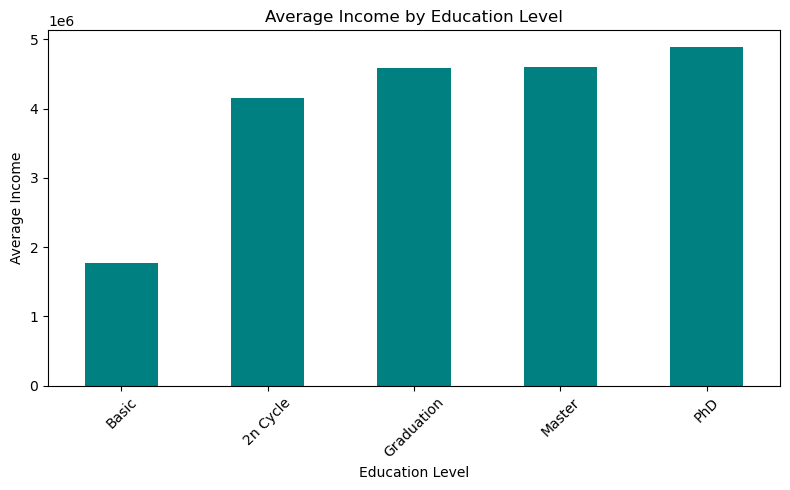

In [753]:
df2.groupby("education")["income"].mean().sort_values(ascending=True).plot(kind='bar', figsize=(8, 5), color='teal')
plt.title("Average Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

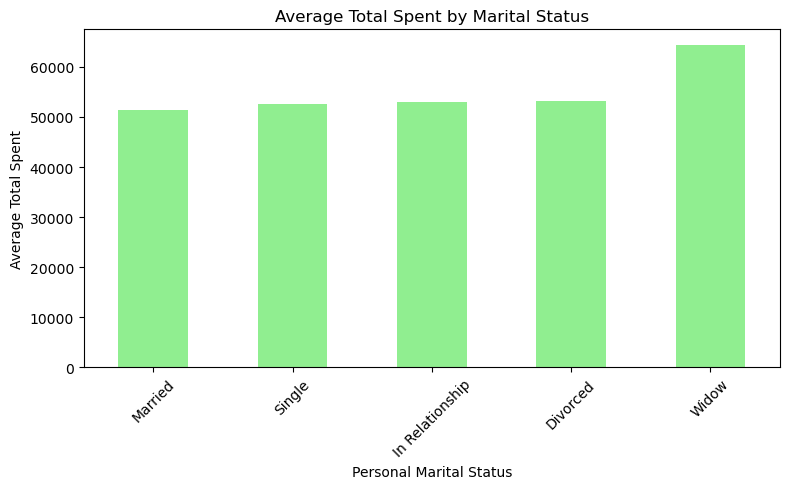

In [754]:
df2.groupby("marital_status")["total_spent"].mean().sort_values(ascending=True).plot(kind="bar",figsize=(8,5), color='lightgreen')

plt.title("Average Total Spent by Marital Status")
plt.xlabel("Personal Marital Status")
plt.ylabel("Average Total Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

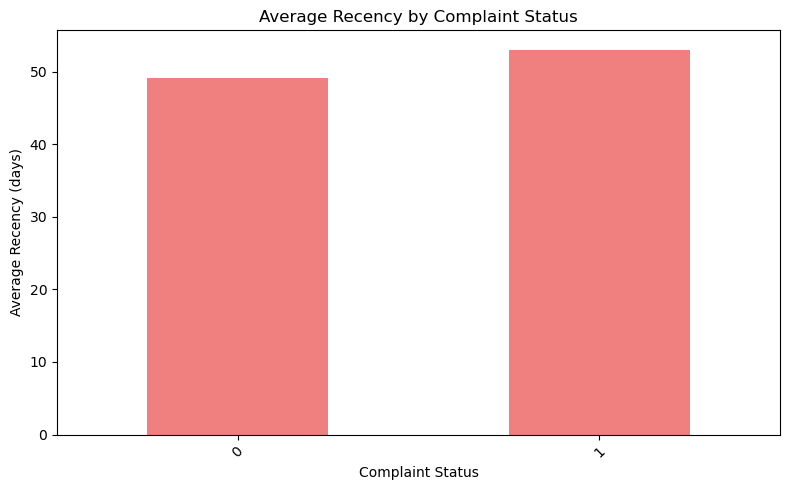

In [755]:
df2.groupby("complain")["recency"].mean().plot(kind='bar', figsize=(8, 5), color='lightcoral')
plt.title("Average Recency by Complaint Status")
plt.xlabel("Complaint Status")
plt.ylabel("Average Recency (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

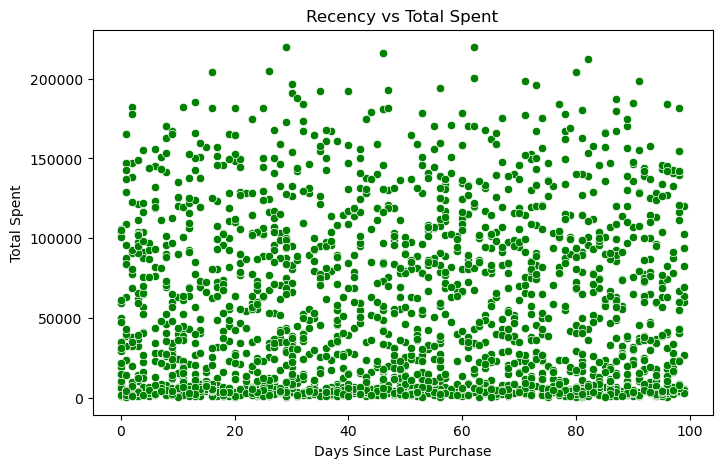

In [756]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="recency", y="total_spent", data=df2, color='green')
plt.title("Recency vs Total Spent")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Total Spent")
plt.show()


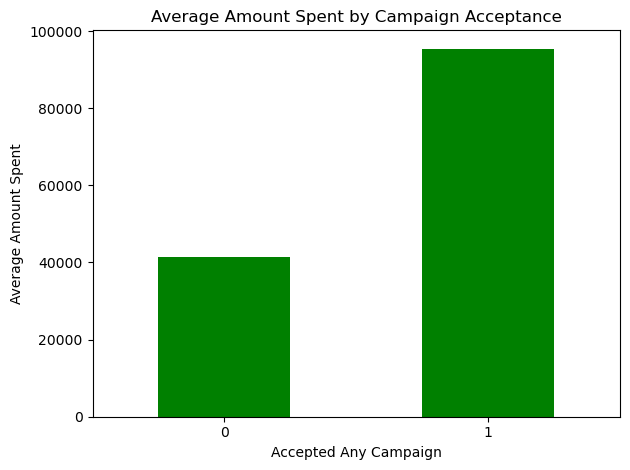

In [757]:
df2.groupby('accepted_any_campaign')['total_spent'].mean().plot(kind='bar',color='green')
plt.title("Average Amount Spent by Campaign Acceptance")
plt.xlabel("Accepted Any Campaign")
plt.ylabel("Average Amount Spent")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


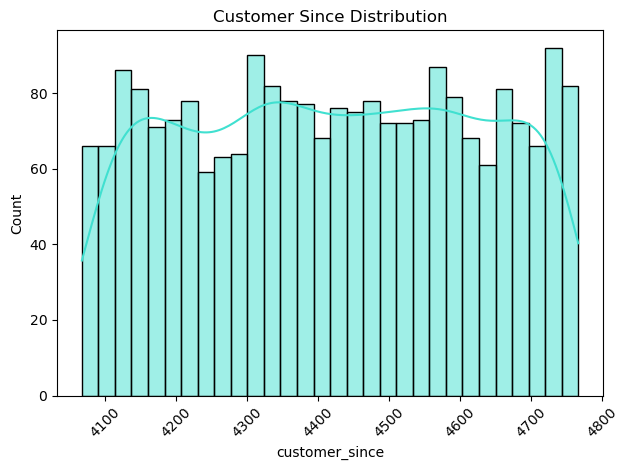

In [758]:
sns.histplot(df2["customer_since"], bins=30, kde=True, color='turquoise')
plt.title("Customer Since Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Removing Outlier**

In [782]:
cols_to_check = ["income", "age", "total_spent","recency","numdealspurchases","numwebpurchases","numstorepurchases","total_children"]
df2[cols_to_check].describe()

,income,age,total_spent,recency,numdealspurchases,numwebpurchases,numstorepurchases,total_children
count,2.233000e+03,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,4.543321e+06,56.107479,52668.116883,49.142409,2.324675,4.085087,5.793551,0.951635
std,2.179976e+06,11.697927,52382.551211,28.948483,1.932741,2.780487,3.253742,0.752170
min,1.505100e+05,29.000000,435.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.083367e+06,48.000000,6003.000000,24.000000,1.000000,2.000000,3.000000,0.000000
50%,4.499379e+06,55.000000,34452.000000,49.000000,2.000000,4.000000,5.000000,1.000000
75%,5.940447e+06,66.000000,90828.000000,74.000000,3.000000,6.000000,8.000000,1.000000
max,5.799994e+07,85.000000,219675.000000,99.000000,15.000000,27.000000,13.000000,3.000000


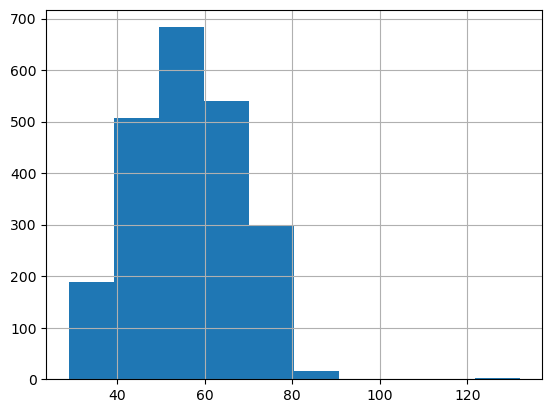

In [760]:
df2['age'].hist()

#We can see that there are some customers with age greater than 100.lets check them
df2[df2.age>100]

#Lets drop the customers with age greater than 100 as they are likely to be data entry errors
df2 = df2[df2.age<100]

<Axes: xlabel='income', ylabel='Count'>

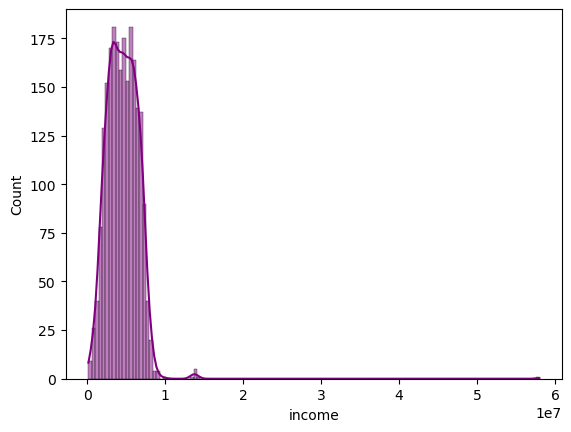

In [761]:
sns.histplot(df2['income'], kde=True, color='purple')

In [762]:
Q1 = df2['income'].quantile(0.25)
Q3 = df2['income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df3 = df2[(df2['income'] >= lower_bound) & (df2['income'] <= upper_bound)]

In [763]:
df3[cols_to_check].describe()

,income,age,total_spent,recency,numdealspurchases,numwebpurchases,numstorepurchases
count,2.225000e+03,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,4.490336e+06,56.120449,52650.366742,49.144270,2.317753,4.097978,5.811685
std,1.792999e+06,11.703427,52312.208226,28.938836,1.894989,2.776494,3.244953
min,1.505100e+05,29.000000,435.000000,0.000000,0.000000,0.000000,0.000000
25%,3.078756e+06,48.000000,6003.000000,24.000000,1.000000,2.000000,3.000000
50%,4.485981e+06,55.000000,34452.000000,50.000000,2.000000,4.000000,5.000000
75%,5.926266e+06,66.000000,90741.000000,74.000000,3.000000,6.000000,8.000000
max,9.894858e+06,85.000000,219675.000000,99.000000,15.000000,27.000000,13.000000


In [764]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   education              2225 non-null   object 
 1   marital_status         2225 non-null   object 
 2   income                 2225 non-null   float64
 3   recency                2225 non-null   int64  
 4   numdealspurchases      2225 non-null   int64  
 5   numwebpurchases        2225 non-null   int64  
 6   numcatalogpurchases    2225 non-null   int64  
 7   numstorepurchases      2225 non-null   int64  
 8   numwebvisitsmonth      2225 non-null   int64  
 9   complain               2225 non-null   int64  
 10  response               2225 non-null   int64  
 11  customer_since         2225 non-null   int64  
 12  age                    2225 non-null   int64  
 13  total_children         2225 non-null   int64  
 14  total_spent            2225 non-null   int64  
 15  accepted_

# **Feature Selection**

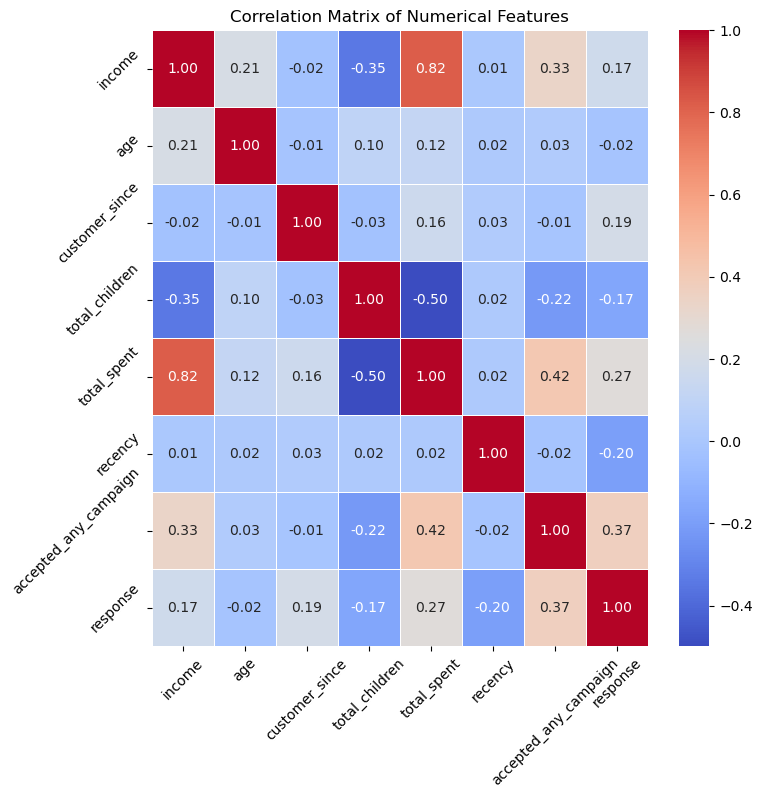

In [765]:
cols_to_check = ["income", "age", "customer_since", "total_children", "total_spent", "recency","accepted_any_campaign","response"]

corr_mat = df3[cols_to_check].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Based on the earlier analysis and the correlation matrix , we will select few columns for clustering

In [766]:
#These are the selected features for clustering

numerical_cols = ["age","total_spent",
                     "income","numdealspurchases","numwebpurchases",
                    "numstorepurchases","total_children"]

df4 = df3[numerical_cols].copy()
df4.head(5)

,age,total_spent,income,numdealspurchases,numwebpurchases,numstorepurchases,total_children
0,68,140679,5058006.0,3,8,4,0
1,71,2349,4031928.0,2,1,2,2
2,60,67512,6230331.0,1,8,10,0
3,41,4611,2318202.0,2,2,4,1
4,44,36714,5071491.0,5,5,6,1


# **Scaling**

In [767]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4[numerical_cols] = pd.DataFrame(scaler.fit_transform(df4), index=df4.index)
                   
df4.head(5)

,age,total_spent,income,numdealspurchases,numwebpurchases,numstorepurchases,total_children
0,1.015277,1.683133,0.316675,0.360108,1.405693,-0.558434,-1.267135
1,1.271670,-0.961777,-0.255723,-0.167718,-1.116038,-1.174914,1.392653
2,0.331563,0.284159,0.970657,-0.695544,1.405693,1.291007,-1.267135
3,-1.292258,-0.918527,-1.211726,-0.167718,-0.755791,-0.558434,0.062759
4,-1.035865,-0.304708,0.324197,1.415760,0.324951,0.058046,0.062759


# **Encoding Categorical Variables**

In [768]:
#OneHotEncoding categorical feature "Marital Status"

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
cat_enc = encoder.fit_transform(df3[['marital_status']])

In [769]:
dummies = pd.DataFrame(
    cat_enc,
    columns=encoder.get_feature_names_out(['marital_status']),
    index=df3.index)

dummies.head(5)

,marital_status_Divorced,marital_status_In Relationship,marital_status_Married,marital_status_Single,marital_status_Widow
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [770]:
#creating  a datafram of scaled and encoded features which will be used for clustering

df4_encod = pd.concat([df4,dummies],axis=1)
df4_encod.columns = df4_encod.columns.astype(str)
df4_encod.head(5)

,age,total_spent,income,numdealspurchases,numwebpurchases,numstorepurchases,total_children,marital_status_Divorced,marital_status_In Relationship,marital_status_Married,marital_status_Single,marital_status_Widow
0,1.015277,1.683133,0.316675,0.360108,1.405693,-0.558434,-1.267135,0.0,0.0,0.0,1.0,0.0
1,1.271670,-0.961777,-0.255723,-0.167718,-1.116038,-1.174914,1.392653,0.0,0.0,0.0,1.0,0.0
2,0.331563,0.284159,0.970657,-0.695544,1.405693,1.291007,-1.267135,0.0,1.0,0.0,0.0,0.0
3,-1.292258,-0.918527,-1.211726,-0.167718,-0.755791,-0.558434,0.062759,0.0,1.0,0.0,0.0,0.0
4,-1.035865,-0.304708,0.324197,1.415760,0.324951,0.058046,0.062759,0.0,0.0,1.0,0.0,0.0


# **CLUSTERING**

In [771]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df4_encod)
    inertia.append(kmeans.inertia_)
inertia

[11601.099527390288,
 9783.722976504361,
 8905.188769055865,
 8072.480434822875,
 7605.0508234366125,
 7082.820985498279,
 6892.176541456849,
 6602.674256303404,
 6353.42929638054]

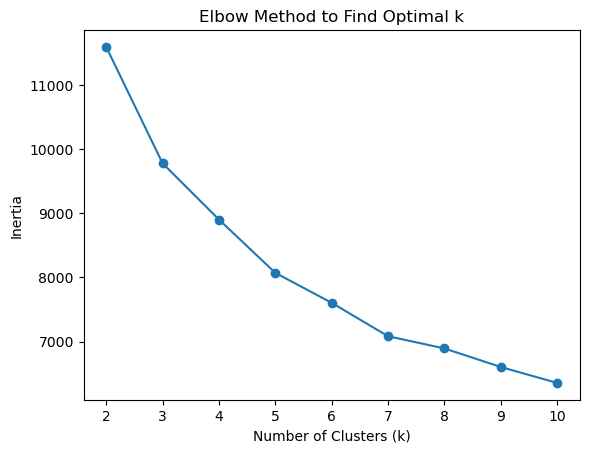

In [772]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal k")
plt.show()

In [773]:
from sklearn.metrics import silhouette_score
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df4_encod)
    sil = silhouette_score(df4_encod, labels)
    sil_scores.append(sil)

# Print scores
for k, s in zip(K_range, sil_scores):
    print(f"k={k}, silhouette={s:.3f}")

k=2, silhouette=0.303
k=3, silhouette=0.276
k=4, silhouette=0.202
k=5, silhouette=0.195
k=6, silhouette=0.197
k=7, silhouette=0.194
k=8, silhouette=0.187
k=9, silhouette=0.187
k=10, silhouette=0.185


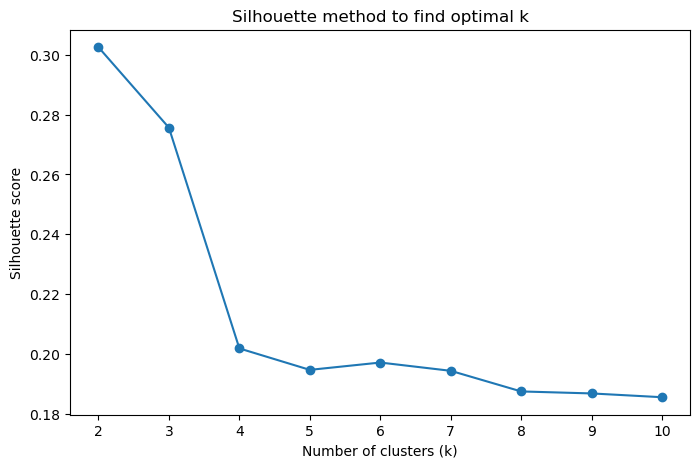

In [774]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette method to find optimal k")
plt.show()


In [775]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_clusters = df3.copy()
df_clusters["cluster"] = kmeans.fit_predict(df4_encod)
df_clusters.head(5)

,education,marital_status,income,recency,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,customer_since,age,total_children,total_spent,accepted_any_campaign,cluster
0,Graduation,Single,5058006.0,58,3,8,10,4,7,0,1,4730,68,0,140679,0,2
1,Graduation,Single,4031928.0,38,2,1,1,2,5,0,0,4180,71,2,2349,0,0
2,Graduation,In Relationship,6230331.0,26,1,8,2,10,4,0,0,4379,60,0,67512,0,2
3,Graduation,In Relationship,2318202.0,26,2,2,0,4,6,0,0,4206,41,1,4611,0,3
4,PhD,Married,5071491.0,94,5,5,3,6,5,0,0,4228,44,1,36714,0,1


In [776]:
#Data points per cluster
df_clusters["cluster"].value_counts()

cluster
3    651
2    607
1    537
0    430
Name: count, dtype: int64

In [777]:
# Summary statistics by cluster
cluster_summary = df_clusters.groupby("cluster")[numerical_cols].mean()
print(cluster_summary)

               age    total_spent        income  numdealspurchases  \
cluster                                                              
0        61.544186   10448.093023  3.602893e+06           2.576744   
1        60.044693   66955.329609  5.056551e+06           4.160149   
2        56.680395  116536.428336  6.525897e+06           1.118616   
3        48.778802    9157.852535  2.711470e+06           1.745008   

         numwebpurchases  numstorepurchases  total_children  
cluster                                                      
0               2.225581           3.441860        1.913953  
1               6.815642           7.789572        1.219739  
2               5.107084           8.533773        0.202636  
3               2.152074           3.207373        0.797235  


In [778]:
edu_counts = df_clusters.groupby(["cluster","marital_status"]).size(
    
).unstack(fill_value=0)
print(edu_counts)

marital_status  Divorced  In Relationship  Married  Single  Widow
cluster                                                          
0                     55              116      159      83     17
1                     65              143      221      84     24
2                     56              151      222     151     27
3                     54              165      259     164      9


# **PCA Visualisation**

In [779]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df4_encod)

df_clusters['pca1'] = pca_result[:, 0]
df_clusters['pca2'] = pca_result[:, 1]

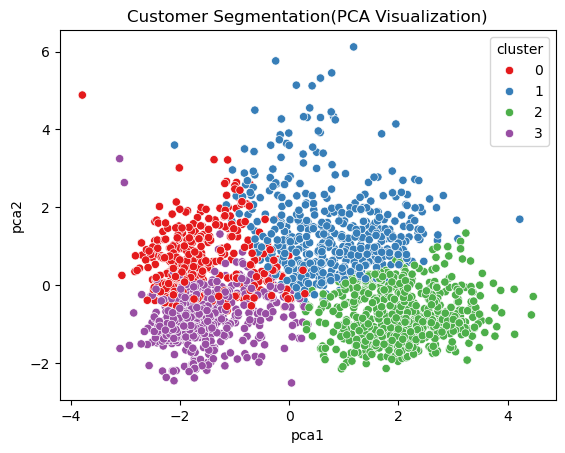

In [780]:
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_clusters, palette='Set1')
plt.title("Customer Segmentation(PCA Visualization)")
plt.show()

# **Saving the files**

In [781]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']